In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

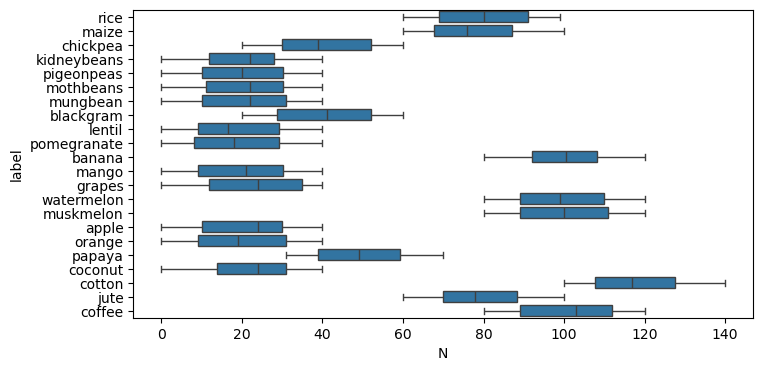

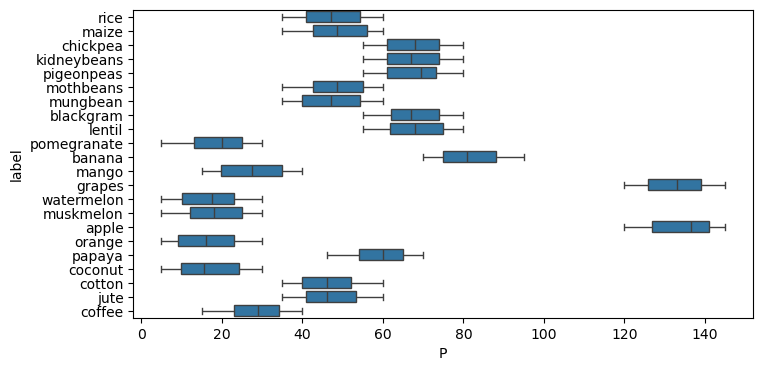

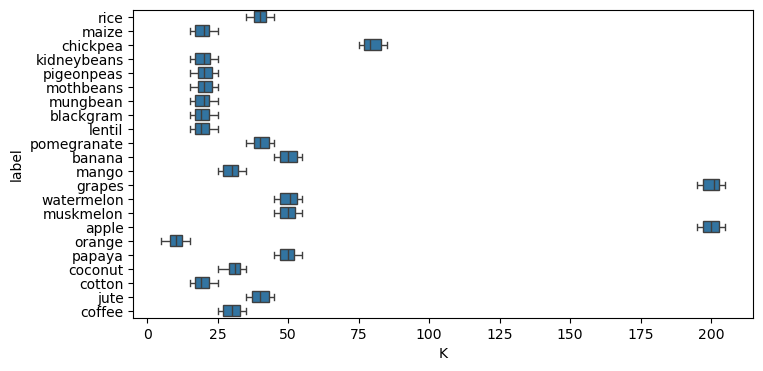

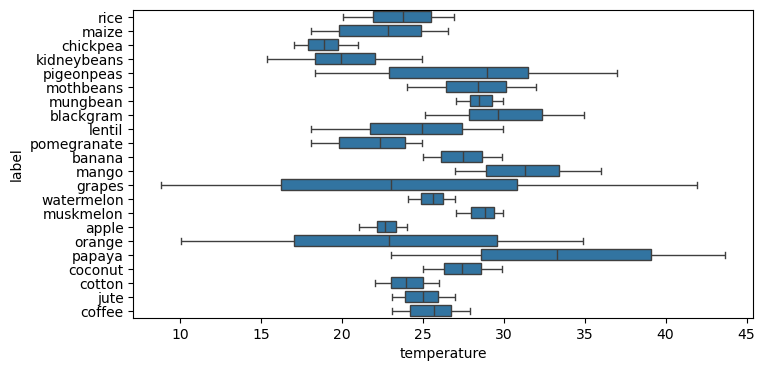

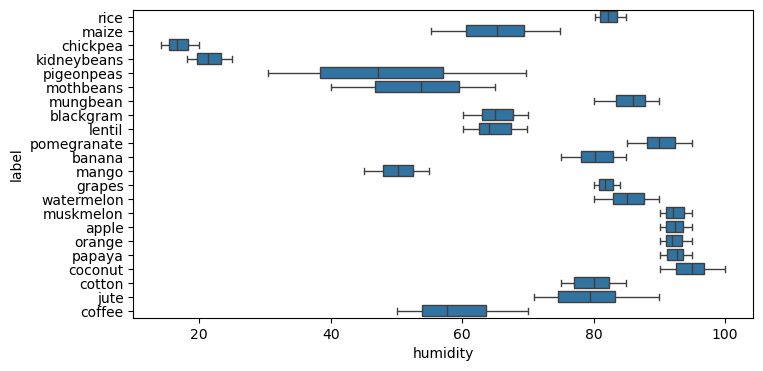

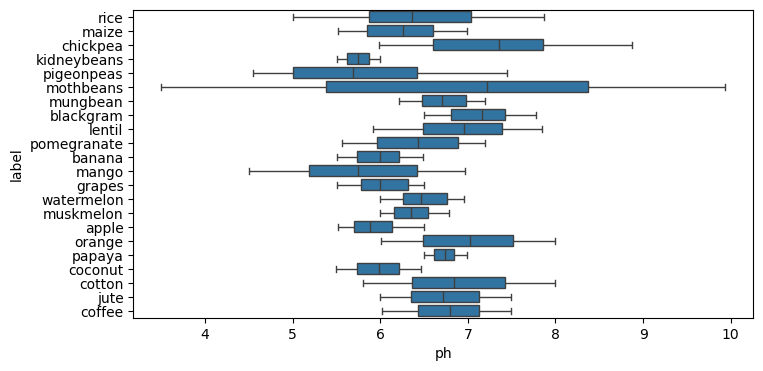

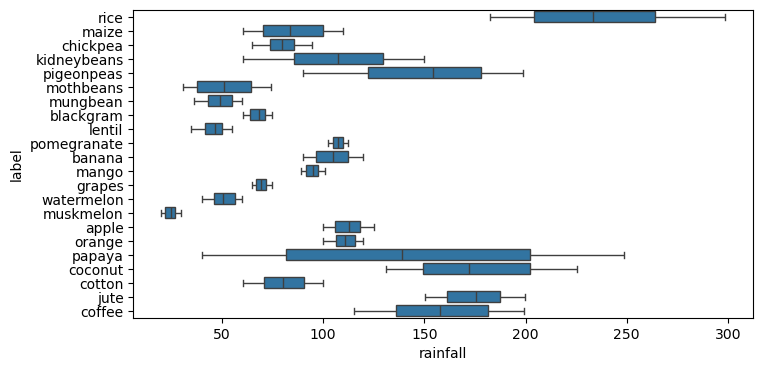

In [4]:

col=["N","P","K","temperature","humidity","ph","rainfall"]
for i in col:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df,x=i,y="label")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: >

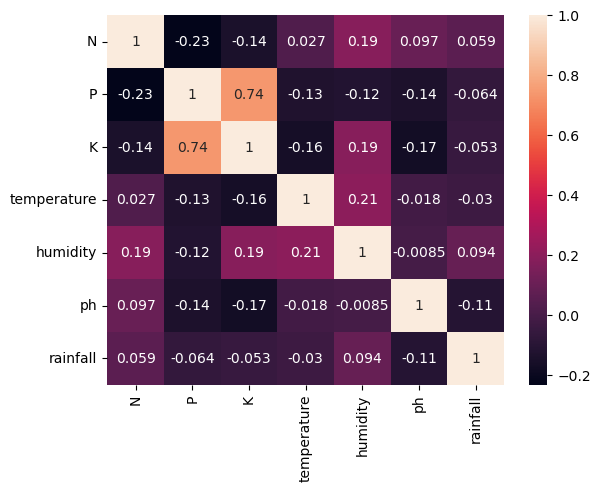

In [8]:

sns.heatmap(df.corr(numeric_only=True),annot=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
for i in col:
    df[i] = df[i].round(2)
    df[[i]]= scaler.fit_transform(df[[i]])

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935524,0.472539,0.039490,1.810444,rice
1,0.933329,0.140616,-0.141185,-0.759723,0.397063,0.737409,2.242142,rice
2,0.255986,0.049647,-0.081939,-0.516763,0.486915,1.771363,2.920992,rice
3,0.635298,-0.556811,-0.160933,0.172613,0.389875,0.659863,2.536978,rice
4,0.743673,-0.344551,-0.121436,-1.083671,0.454568,1.499950,2.898425,rice
...,...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.227921,-0.227860,0.401374,1.352356,coffee
2196,1.312641,-1.163269,-0.417666,0.356315,-0.666788,-0.490412,0.445099,coffee
2197,1.827421,-0.617457,-0.358420,-0.293555,-0.191020,-0.141452,1.271367,coffee
2198,1.800327,-0.647780,-0.279425,0.129157,-0.869405,0.375525,0.431631,coffee


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()

In [16]:
df['Label'] = le.fit_transform(df['label'])

In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Label
0,1.068797,-0.344551,-0.101688,-0.935524,0.472539,0.039490,1.810444,rice,20
1,0.933329,0.140616,-0.141185,-0.759723,0.397063,0.737409,2.242142,rice,20
2,0.255986,0.049647,-0.081939,-0.516763,0.486915,1.771363,2.920992,rice,20
3,0.635298,-0.556811,-0.160933,0.172613,0.389875,0.659863,2.536978,rice,20
4,0.743673,-0.344551,-0.121436,-1.083671,0.454568,1.499950,2.898425,rice,20


In [30]:
X= df.drop(['label','Label'], axis=1)
y=df['Label']

In [31]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [32]:
x_train_scaler=scaler.fit_transform(X_train)
x_test_scaler=scaler.fit_transform(X_test)

In [33]:
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

In [34]:
models= {
    "logistic_regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Neive_bayes":GaussianNB(),
    "Decision_tree":DecisionTreeClassifier(),
    "SVM":SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "XGBoost Classifier":XGBClassifier()
}
result2=[]

In [35]:
for name,model in models.items():
    model.fit(x_train_scaler,y_train)
    y_pred= model.predict(x_test_scaler)
    acc=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred,average='weighted')
    pre=precision_score(y_test,y_pred,average='weighted')
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    result2.append({
        "model":name,"accuracy":round(acc,4),'recall':round(recall,4),'precision':round(pre,4)})

In [36]:
pd.DataFrame(result2)

,model,accuracy,recall,precision
0,logistic_regression,0.9773,0.9773,0.9784
1,KNN,0.9614,0.9614,0.9656
2,Neive_bayes,0.9909,0.9909,0.9912
3,Decision_tree,0.9227,0.9227,0.9387
4,SVM,0.9864,0.9864,0.9872
5,Gradient Boosting Classifier,0.9386,0.9386,0.9481
6,Ada Boost Classifier,0.1659,0.1659,0.0829
7,Random Forest Classifier,0.9659,0.9659,0.9706
8,XGBoost Classifier,0.9432,0.9432,0.9517


In [37]:
import joblib
joblib.dump(models['Random Forest Classifier'],'model.pkl')

['model.pkl']

In [38]:

joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [40]:

joblib.dump(X.columns.tolist(),"coloum.pkl")

['coloum.pkl']